In [4]:
# 1) Start by importing all important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
# 2) Read the csv file and assign it to a variable
cars_data=pd.read_csv('car.csv')

In [7]:
cars_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [8]:
# 3) Display shape of dataframe
cars_data.shape

(398, 9)

In [9]:
# 4)  Print all columns of dataframe
cars_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [10]:
#6) Set the 'name' column as the index of dataframe
cars_data=cars_data.set_index('name',drop=False)

In [11]:
#7) Print a list of all the unique mpg values
unique_values=cars_data['mpg'].unique()
unique_values

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [16]:
#8) Create a column which contains the horsepower divided by weightas its metric and make this new column the index.
cars_data['hp_to_weight']=cars_data['horsepower']/cars_data['weight']
cars_data=cars_data.set_index('hp_to_weight', drop=False)

In [14]:
#1. What is name of car that has the highest horsepower?
car_maxhp=cars_data.loc[cars_data['horsepower'].idxmax()]
print("highest horsepower car:", car_maxhp['name'])


highest horsepower car: pontiac grand prix


In [15]:
# 2. How many cars have mpg ≥ 35?
cars_count=(cars_data['mpg']>=35).sum()
print("no. of cars with mpg>=35 is:", cars_count)

no. of cars with mpg>=35 is: 36


In [17]:
# 3. What is the most common origin for cars with horsepower > 100 and weight < 3000?
final_cars=cars_data[(cars_data['horsepower']>100) & (cars_data['weight']<3000)]
mostCommon_origin=final_cars['origin'].value_counts().idxmax()
print(mostCommon_origin)

usa


In [19]:
# 4. What is the mean acceleration of cars from Japan? (rounded to 2 decimals)
japan_cars=cars_data[cars_data['origin']=='japan']
japan_cars['acceleration']=pd.to_numeric(japan_cars['acceleration'],errors='coerce')
japan_mean_acc=japan_cars['acceleration'].mean()   
print("Mean acceleration of japan cars is:", japan_mean_acc)

Mean acceleration of japan cars is: 16.17215189873418


C:\Users\Mahi Garg\AppData\Local\Temp\ipykernel_19324\138250453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  japan_cars['acceleration']=pd.to_numeric(japan_cars['acceleration'],errors='coerce')


In [20]:
#5) Which year had the highest average mpg?
highavg_mpg_year=cars_data.groupby('model_year')['mpg'].mean().idxmax()
print(highavg_mpg_year)

80


In [22]:
#Find the car (or cars) with the best ratio of horsepower to weight among all cars that also have above-median mpg
mpg_median=cars_data['mpg'].median()
mpg_aboveMedian_cars=cars_data[cars_data['mpg']>mpg_median].copy()
mpg_aboveMedian_cars['hp_ratio_weight']=mpg_aboveMedian_cars['horsepower']/mpg_aboveMedian_cars['weight']
max_ratio=mpg_aboveMedian_cars['hp_ratio_weight'].max()
best_ratiocars=mpg_aboveMedian_cars[mpg_aboveMedian_cars['hp_ratio_weight']==max_ratio]
print(best_ratiocars['name'])



hp_to_weight
0.050582    bmw 2002
Name: name, dtype: object


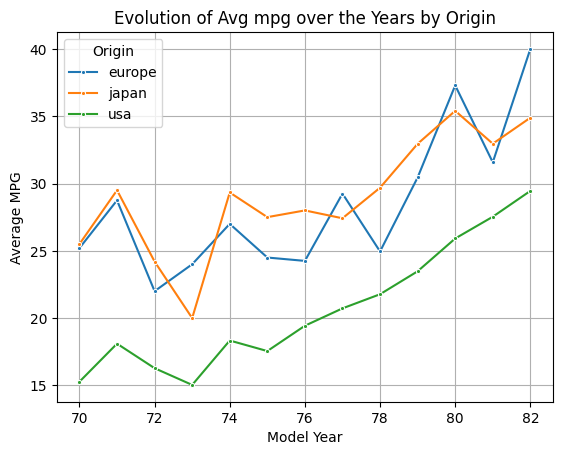

In [23]:
#Design a multi-line plot using Matplotlib or Seaborn that shows the evolution of average mpg over the years, separately for each origin
avg_mpg_evolution = cars_data.groupby(['model_year', 'origin'])['mpg'].mean().reset_index()


sns.lineplot(data=avg_mpg_evolution, x='model_year', y='mpg', hue='origin', marker='.')

# Plot customization
plt.title('Evolution of Avg mpg over the Years by Origin')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.legend(title='Origin')
plt.grid(True)
plt.show()